In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
import numpy as np
import sys
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, ifft
from scipy import signal
from scipy.interpolate import interp1d
abspath = '/home/shubham1/spartan_mount'
# abspath = '/data/cephfs/punim0895'
sys.path.append(abspath + '/hwu1/slicedatareadWriteHipstar/jupyter_codes')
# from deriv import *
# from lib_msh import *
import scipy.io as sio
path = abspath + '/hwu1/slicedatareadWriteHipstar/cd_airfoil_inputData_allMach/'

In [2]:
allmach = [0.2,0.3,0.4,0.5]
datall = [None]*len(allmach)
xall = [None]*len(allmach)
yall = [None]*len(allmach)
for k,M in enumerate(allmach):
#     DATAF2 = np.load(path+'M0'+str(int(M*10))+'_spod_data/flowdata_b2_M0'+str(int(M*10))+'.npz')
    DATAG2 = np.load(path+'M0'+str(int(M*10))+'_spod_data/griddata_b2_M0'+str(int(M*10))+'.npz')
#     datall[k] = DATAF2['p1']
    xall[k] = DATAG2['x1']
    yall[k] = DATAG2['y1']

In [3]:
allmach = [0.2,0.3,0.4,0.5]
datall1 = [None]*len(allmach)
xall1 = [None]*len(allmach)
yall1 = [None]*len(allmach)
for k,M in enumerate(allmach):
#     DATAF3 = np.load(path+'M0'+str(int(M*10))+'_spod_data/flowdata_b3_M0'+str(int(M*10))+'.npz')
    DATAG3 = np.load(path+'M0'+str(int(M*10))+'_spod_data/griddata_b3_M0'+str(int(M*10))+'.npz')
#     datall1[k] = DATAF3['p2']
    xall1[k] = DATAG3['x2']
    yall1[k] = DATAG3['y2']

In [8]:
%matplotlib notebook
import os
dtall = [0.003,0.003,0.005,0.005]
# block =3
savePall = [None]*8
count = 0
for b, block in enumerate([2,3]):
    for k,M in enumerate(allmach):
        if block==3:
            x = xall1[k]
            y = yall1[k]
            data = datall1[k]
        else:
            x = xall[k]
            y = yall[k]
            data = datall[k]

        Nt = data.shape[-1]
        dt=dtall[k]

        tf = np.fft.fftshift(np.fft.fftfreq(Nt,dt))

        Xtemp = tf[:]    # w   

        mac = 1.0/M
        mhy = 1
        FS = np.fft.fft(data,axis=-1)

        Z6 = np.fft.fftshift(FS)
        
        savePall[count] = Z6
        count += 1


In [11]:
np.savez('M02_b2.npz',m2b2 = savePall[0])
np.savez('M03_b2.npz',m3b2 = savePall[1])
np.savez('M04_b2.npz',m4b2 = savePall[2])
np.savez('M05_b2.npz',m5b2 = savePall[3])
np.savez('M02_b3.npz',m2b3 = savePall[4])
np.savez('M03_b3.npz',m3b3 = savePall[5])
np.savez('M04_b3.npz',m4b3 = savePall[6])
np.savez('M05_b3.npz',m5b3 = savePall[7])

In [9]:
AA = np.load('M04_b2.npz')
A42 = AA['m4b2']

In [15]:
A42.shape

(543, 212, 2999)

/home/shubham1/.local/lib/python2.7/site-packages/numpy/ma/core.py:2788: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


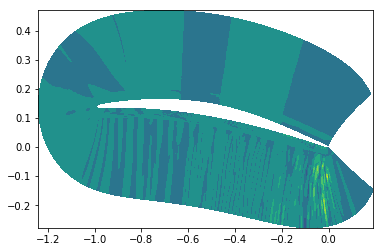

In [16]:
fig = plt.figure()
plt.contourf(xall[2], yall[2], A42[:,:,20],)


In [4]:
xall[2].shape

(543, 212)

In [10]:
tf = np.fft.fftshift(np.fft.fftfreq(3000,0.005))


In [14]:
tf[2]-tf[1]

0.06666666666667709